# CHAPTER 10
# Introduction to Artificial Neural Nerworks with Keras

$n = \text{\#instances}$  
$p = \text{\#features/inputs}$   
$m = \text{\#neurons in layer}$

**Feed-forward**  
$\text{hidden unit}:\hspace{.5cm} z_{ik} = \phi( b_k^{(h)} + \sum_{j=1}^p w_{jk}^{(h)}x_{ij} ), \hspace{.5cm} k=1,...,m$  


$\text{textbook}: \hspace{1.15cm} z = \phi(W_{p \times m}^{\top} X_{n \times p} + b_{m \times n}) \hspace{.5cm} (\text{broadcast} \; b, n \text{ times})$  
$\text{implementation}: \hspace{.1cm} z = \phi(X_{n \times p} W_{p \times m} + b_{n \times m}) \hspace{.5cm} \text{(equiv. taking transpose as \;} (AB)^\top = B^\top A)$

**Recurrent** - review/correct this using pg. 540/568  
$\text{hidden unit}:\hspace{.5cm} z_{ik}(t) = \phi( b_k^{(h)} + \sum_{j=1}^p w_{jk}^{(h)}x_{ij}(t) + \sum_{j=1}^m u_{jk}^{(h)}z_{ij}(t-1) ), \hspace{.5cm} k=1,...,m$  
$\text{implementation}: \hspace{.1cm} z(t) = \phi(X_{n \times p}(t) W_{p \times m} + z_{n \times m}(t-1) U_{m \times m} + b_{n \times m})$

**Hyperparameters (model configeration)**

In [2]:
# Import built-in Python modules
import time
import os
import sys
sys.path.append("..")

# Import third-party modules
import pandas as pd
import tensorflow as tf

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.file_management import Logger
from src.file_management.file_handling import *

## 1. Image Classifier (Fashion MNIST)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
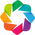

In [224]:
import tensorflow as tf
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

### 1.1 Load data

In [10]:
# 1. Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# 2. Split the full training set into a validation set and a (smaller) training set
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# 3. Scale the input features and test set
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# 4. Create a list of class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


print(X_train.shape)
print(X_train.dtype)
print(class_names[y_train[0]])


In [251]:
# Display the first 4 images using Holoviews with the Greys color map
images = [hv.Image(X_train[index], label=class_names[y_train[index]]) for index in range(4)]
layout = hv.Layout(images).opts(width=100, height=100, toolbar=None).cols(2)

layout.opts(hv.opts.Image(cmap='Greys', active_tools=[], xlabel='', ylabel=''))

:Layout
   .Image.Ankle_boot                       :Image   [x,y]   (z)
   .Image.T_hyphen_minus_shirt_over_top.I  :Image   [x,y]   (z)
   .Image.T_hyphen_minus_shirt_over_top.II :Image   [x,y]   (z)
   .Image.Dress                            :Image   [x,y]   (z)

### 1.2 Create model

In [179]:
tf.keras.backend.clear_session()

In [180]:
# 4. Create a model
tf.random.set_seed(42)

inputs = tf.keras.layers.Input(shape=[28, 28])
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(300, activation="relu")(x)
x = tf.keras.layers.Dense(100, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [182]:
# Get the first hidden layer
hidden1 = model.layers[2]
print("layer name:", hidden1.name)

# Get the first hidden layer weights
print("layer:", model.get_layer('dense'))

# Get the first hidden layer weights
weights, biases = hidden1.get_weights()

print("biases.shape:", biases.shape)
print("weights.shape:", weights.shape)

print("Bias for first image:", biases[0])
print("Weight for each pixel of first image:", weights[0], sep='\n')

layer name: dense
layer: <keras.layers.core.dense.Dense object at 0x0000020321810730>
biases.shape: (300,)
weights.shape: (784, 300)
Bias for first image: 0.0
Weight for each pixel of first image:
[-2.79023908e-02 -3.80609483e-02 -4.55811769e-02  7.27839321e-02
 -3.46226990e-03  3.57981995e-02 -3.98299955e-02 -9.48570669e-03
 -4.30084951e-02 -1.89149901e-02  3.85896564e-02 -5.46519756e-02
  6.10879958e-02 -4.89380136e-02  8.95410776e-05 -4.46995683e-02
 -6.92071989e-02  5.89855164e-02  2.54287422e-02 -2.38347091e-02
  1.33569762e-02  5.24006039e-03 -4.30643559e-05  4.01200280e-02
 -5.60182184e-02  2.66987011e-02  3.73347253e-02  4.10837606e-02
 -3.16527747e-02 -4.62879911e-02 -1.38026215e-02 -3.18532139e-02
  6.87798113e-02  1.79802030e-02 -5.58515638e-03 -7.87514448e-03
  5.14350384e-02 -5.70946038e-02 -2.16984488e-02 -5.14916256e-02
 -1.00819319e-02 -6.61563426e-02 -6.34577721e-02 -1.39185041e-02
  4.11332697e-02 -2.03911364e-02  2.81835347e-03  4.49559018e-02
 -5.99862486e-02 -4.446

In [183]:
# 5. Compile the model
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

# 6. Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
# calling model.fit again will continue training where it left off

Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7141 - accuracy: 0.7686 - val_loss: 0.5046 - val_accuracy: 0.8276
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4896 - accuracy: 0.8301 - val_loss: 0.4670 - val_accuracy: 0.8314
Epoch 3/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4449 - accuracy: 0.8442 - val_loss: 0.4292 - val_accuracy: 0.8500
Epoch 4/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4203 - accuracy: 0.8531 - val_loss: 0.4001 - val_accuracy: 0.8552
Epoch 5/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3995 - accuracy: 0.8604 - val_loss: 0.3955 - val_accuracy: 0.8596
Epoch 6/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3831 - accuracy: 0.8639 - val_loss: 0.4006 - val_accuracy: 0.8596
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3706 - accuracy: 0.8692 - val_loss: 0.3818 - val_accuracy:

In [244]:
# 7. Plot the learning curves using hvPlot
def plot_learning_curves(history):
    layout = hv.Overlay(
        [
            hv.Curve(history.history["loss"], label="loss").opts(color="red"),
            hv.Curve(history.history["val_loss"], label="val_loss").opts(
                color="red", line_width=0.5
            ),
            hv.Points(history.history["val_loss"], label="val_loss").opts(
                color="red",
            ),
            hv.Curve(history.history["accuracy"], label="accuracy").opts(color="blue"),
            hv.Curve(history.history["val_accuracy"], label="val_accuracy").opts(
                color="blue", line_width=0.5
            ),
            hv.Points(history.history["val_accuracy"], label="val_accuracy").opts(
                color="blue",
            ),
        ]
    )

    layout.opts(opts.Points(size=5, tools=['hover']))

    return layout.opts(
        width=600,
        height=400,
        ylim=(0, 1),
        xlabel="Epochs",
        ylabel="Loss/Accuracy",
        legend_position="bottom_left",
        show_grid=True,
        active_tools=[],
        toolbar=None,
    )

plot_learning_curves(history)

:Overlay
   .Curve.Loss          :Curve   [x]   (y)
   .Curve.Val_loss      :Curve   [x]   (y)
   .Points.Val_loss     :Points   [x,y]
   .Curve.Accuracy      :Curve   [x]   (y)
   .Curve.Val_accuracy  :Curve   [x]   (y)
   .Points.Val_accuracy :Points   [x,y]

In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training, but that’s not actually the case. The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch, so the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

In [245]:
# 8. Train model on optimal # epochs
...

In [246]:
# 9. Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8842


[0.35292842984199524, 0.8841999769210815]

In [252]:
# 10. Make predictions
X_new = X_test[:3] # pretend these are new instances
y_proba = model.predict(X_new)
print(y_proba.round(2))

# Predict class with highest probability
y_pred = y_proba.argmax(axis=-1)
print(y_pred)
print(np.array(class_names)[y_pred])


# Display predictions
images = [hv.Image(X_new[index], label=class_names[y_pred[index]]) for index in range(len(X_new))]
layout = hv.Layout(images).opts(width=50, height=50, toolbar=None)

layout.opts(hv.opts.Image(cmap='Greys', active_tools=[], xlabel='', ylabel=''))

1/1 [==============================] - 0s 24ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


:Layout
   .Image.Ankle_boot :Image   [x,y]   (z)
   .Image.Pullover   :Image   [x,y]   (z)
   .Image.Trouser    :Image   [x,y]   (z)

## 2. Regression MLP (California housing)

### 2.1 Load data

In [255]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)


### 2.1 Create Model (Basic)

In [284]:
# Sequential API
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential(
    [
        norm_layer,
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

model.summary()


# Functional API
tf.random.set_seed(42)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = tf.keras.layers.Normalization()(input_)
hidden1 = tf.keras.layers.Dense(50, activation="relu")(normalized)
hidden2 = tf.keras.layers.Dense(50, activation="relu")(hidden1)
hidden3 = tf.keras.layers.Dense(50, activation="relu")(hidden2)
output = tf.keras.layers.Dense(1)(hidden3)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)


# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


# Evaluate the model
mse_test, rmse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

for index in range(len(X_new)):
    print(
        f"Prediction: {y_pred[index][0]:.2f}, Actual: {y_test[index]:.2f}, Difference: {y_pred[index][0] - y_test[index]:.2f}"
    )

print("mse_test:", mse_test)
print("rmse_test:", rmse_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliza  (None, 8)                17        
 tion)                                                           
                                                                 
 dense_77 (Dense)            (None, 50)                450       
                                                                 
 dense_78 (Dense)            (None, 50)                2550      
                                                                 
 dense_79 (Dense)            (None, 50)                2550      
                                                                 
 dense_80 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,618
Trainable params: 5,601
Non-trainable params: 17
___________________________________________________

### 2.1 Create Model (Wide & Deep) (all featuers wide & deep)

In [285]:
tf.random.set_seed(42)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = tf.keras.layers.Normalization()(input_)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(normalized)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([normalized, hidden2])

output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)


# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


# Evaluate the model
mse_test, rmse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

for index in range(len(X_new)):
    print(
        f"Prediction: {y_pred[index][0]:.2f}, Actual: {y_test[index]:.2f}, Difference: {y_pred[index][0] - y_test[index]:.2f}"
    )

print("mse_test:", mse_test)
print("rmse_test:", rmse_test)

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 normalization_22 (Normalizatio  (None, 8)           17          ['input_17[0][0]']               
 n)                                                                                               
                                                                                                  
 dense_85 (Dense)               (None, 30)           270         ['normalization_22[0][0]']       
                                                                                                  
 dense_86 (Dense)               (None, 30)           930         ['dense_85[0][0]']        

In [286]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 2.1 Create Model (Wide & Deep) (select features wide & deep)
This model performs poorly...

In [304]:
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5], name="input_wide")  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep")  # features 2 to 7

norm_wide_layer = tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()
norm_wide = norm_wide_layer(input_wide)
norm_deep = norm_deep_layer(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep, = X_test_wide[:3], X_test_deep[:3]
y_new = y_test[:3]
norm_wide_layer.adapt(X_train_wide)
norm_deep_layer.adapt(X_train_deep)


# Train the model
history = model.fit(
    {"input_wide": X_train_wide, "input_deep": X_train_deep},
    y_train,
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid),
)

# Evaluate the model
mse_test, rmse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))


for index in range(len(X_new_wide)):
    print(
        f"Prediction: {y_pred[index][0]:.2f}, Actual: {y_new[index]:.2f}, Difference: {y_pred[index][0] - y_test[index]:.2f}"
    )

print("mse_test:", mse_test)
print("rmse_test:", rmse_test)

Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_deep (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 normalization_50 (Normalizatio  (None, 6)           13          ['input_deep[0][0]']             
 n)                                                                                               
                                                                                                  
 input_wide (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_124 (Dense)              (None, 30)           210         ['normalization_50[0][0]']

### 2.1 Create Model (Wide & Deep) (inc. aux output)
This model performs poorly...

In [308]:
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5], name="input_wide")  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep")  # features 2 to 7

norm_wide_layer = tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()
norm_wide = norm_wide_layer(input_wide)
norm_deep = norm_deep_layer(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([norm_wide, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss={"output": "mse", "aux_output": "mse"},
    loss_weights=(0.9, 0.1),
    optimizer=optimizer,
    metrics=["RootMeanSquaredError"],
)


X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
(
    X_new_wide,
    X_new_deep,
) = (
    X_test_wide[:3],
    X_test_deep[:3],
)
y_new = y_test[:3]

norm_wide_layer.adapt(X_train_wide)
norm_deep_layer.adapt(X_train_deep)


# Train the model
history = model.fit(
    {"input_wide": X_train_wide, "input_deep": X_train_deep},
    y_train,
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid),
)

history = model.fit(
    {"input_wide": X_train_wide, "input_deep": X_train_deep},
    {"output": y_train, "aux_output": y_train},
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
)

# Evaluate the model
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

print("weighted_sum_of_losses:", weighted_sum_of_losses)
print("main_loss:", main_loss)
print("aux_loss:", aux_loss)
print("main_rmse:", main_rmse)
print("aux_rmse:", aux_rmse)

# Predictions
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

# y_pred_tuple = model.predict((X_new_wide, X_new_deep))
# y_pred = dict(zip(model.output_names, y_pred_tuple))

Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_deep (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 normalization_58 (Normalizatio  (None, 6)           13          ['input_deep[0][0]']             
 n)                                                                                               
                                                                                                  
 input_wide (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_133 (Dense)              (None, 30)           210         ['normalization_58[0][0]']

## 3. Saving and Callbacks

We use the first California housing model for testing.

### 3.1 Callbacks (inc. saving)

In [7]:
# Load data (COPIED FROM ABOVE)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)


In [21]:
def build_model(input_shape):

    norm_layer = tf.keras.layers.Normalization()

    input_ = tf.keras.layers.Input(shape=input_shape)
    normalized = norm_layer(input_)
    hidden1 = tf.keras.layers.Dense(50, activation="relu")(normalized)
    hidden2 = tf.keras.layers.Dense(50, activation="relu")(hidden1)
    hidden3 = tf.keras.layers.Dense(50, activation="relu")(hidden2)
    output = tf.keras.layers.Dense(1)(hidden3)

    model = tf.keras.Model(inputs=[input_], outputs=[output])

    model.compile(
        loss='categorical_crossentropy', 
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy', 'RootMeanSquaredError'])

    norm_layer.adapt(X_train)

    return model

# def get_run_logdir(root_logdir="my_logs"):
#     return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

# run_logdir = get_run_logdir() # e.g., my_logs/run_2022_08_01_17_25_59

def train_model(model, checkpoint_dir, initial_epoch=0, max_epochs=10):
    start_time = time.time()

    checkpoint_cb = MyModelCheckpoint(model,
        os.path.join(checkpoint_dir, 'model-{epoch:02d}-{val_loss:.2f}.hdf5'), # remove .hdf5 to save as tf model
        monitor='val_loss',verbose=1)

    lr_sched_cb = step_decay_schedule(initial_lr=1e-4, decay_factor=0.75, \
                                      step_size=2)
    
    tensorboard_cb = tf.keras.callbacks.TensorBoard(checkpoint_dir / 'TB_logs', profile_batch=(100, 200))


    cb = [checkpoint_cb, lr_sched_cb, tensorboard_cb]

    model.fit(X_train, y_train,
              epochs=max_epochs,
              initial_epoch = initial_epoch,
              callbacks=cb,
              validation_data=(X_test, y_test))

    score = model.evaluate(X_test, y_test, verbose=0, callbacks=cb)
    print('Test loss: {}'.format(score[0]))
    print('Test accuracy: {}'.format(score[1]))

    elapsed_time = time.time() - start_time
    print("Elapsed time: {}".format(hms_string(elapsed_time)))

In [22]:
# batch_size = 128 # note used in this example
# num_classes = 10 # note used in this example

run_dir = generate_output_dir(MODELS_DIR, "test-train")
print(f"Results saved to: {run_dir}")

Results saved to: ..\models\00001-test-train


In [24]:
input_shape = X_train.shape[1:]

with Logger(Path(run_dir) / 'log.txt'):
    #input_shape, x_train, y_train, x_test, y_test = obtain_data()
    model = build_model(input_shape)
    train_model(model, Path(run_dir), max_epochs=15)

Epoch 1/15
355/363 [============================>.] - ETA: 0s - loss: 2.4812e-07 - accuracy: 0.0000e+00 - root_mean_squared_error: 2.3177
Epoch 1: saving model to ..\models\00001-test-train\model-01-0.00.hdf5

Epoch 00001: saving optimizer to ..\models\00001-test-train\model-01-0.00.pickle
363/363 [==============================] - 3s 5ms/step - loss: 2.4821e-07 - accuracy: 0.0000e+00 - root_mean_squared_error: 2.3194 - val_loss: 2.4595e-07 - val_accuracy: 0.0000e+00 - val_root_mean_squared_error: 2.2992 - lr: 1.0000e-04
Epoch 2/15
358/363 [============================>.] - ETA: 0s - loss: 2.4794e-07 - accuracy: 0.0000e+00 - root_mean_squared_error: 2.3166
Epoch 2: saving model to ..\models\00001-test-train\model-02-0.00.hdf5

Epoch 00002: saving optimizer to ..\models\00001-test-train\model-02-0.00.pickle
363/363 [==============================] - 1s 3ms/step - loss: 2.4821e-07 - accuracy: 0.0000e+00 - root_mean_squared_error: 2.3194 - val_loss: 2.4595e-07 - val_accuracy: 0.0000e+00 -

In [15]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
   for step in range(1, 1000 + 1):
    tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
    
    data = (np.random.randn(100) + 2) * step / 100 # gets larger
    tf.summary.histogram("my_hist", data, buckets=50, step=step)
    
    images = np.random.rand(2, 32, 32, 3) * step / 1000 # gets brighter
    tf.summary.image("my_images", images, step=step)
    
    texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
    tf.summary.text("my_text", texts, step=step)
    
    sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
    audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
    tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


In [9]:
MODEL_PATH = Path('../models/00002-test-train/model-04-0.00.hdf5')
OPT_PATH = Path('../models/00002-test-train/model-04-0.00.pickle')

epoch, model, opt = load_model_data(MODEL_PATH, OPT_PATH)

In [10]:
run_dir = generate_output_dir(MODELS_DIR, "cont-train")
print(f"Results saved to: {run_dir}")

Results saved to: ..\models\00006-cont-train


In [13]:
# with Logger(os.path.join(run_dir, 'log.txt')):
with Logger(Path(run_dir) / 'log.txt'):
    train_model(model, run_dir, initial_epoch=epoch, max_epochs=20)

Epoch 5/20
344/363 [===========================>..] - ETA: 0s - loss: 2.4844e-07 - accuracy: 0.0000e+00 - root_mean_squared_error: 2.3715
Epoch 5: saving model to ..\models\00006-cont-train\model-05-0.00.hdf5

Epoch 00005: saving optimizer to ..\models\00006-cont-train\model-05-0.00.pickle
363/363 [==============================] - 1s 4ms/step - loss: 2.4821e-07 - accuracy: 0.0000e+00 - root_mean_squared_error: 2.3696 - val_loss: 2.4595e-07 - val_accuracy: 0.0000e+00 - val_root_mean_squared_error: 2.3482 - lr: 5.6250e-05
Epoch 6/20
348/363 [===========================>..] - ETA: 0s - loss: 2.4847e-07 - accuracy: 0.0000e+00 - root_mean_squared_error: 2.3724
Epoch 6: saving model to ..\models\00006-cont-train\model-06-0.00.hdf5

Epoch 00006: saving optimizer to ..\models\00006-cont-train\model-06-0.00.pickle
363/363 [==============================] - 1s 3ms/step - loss: 2.4821e-07 - accuracy: 0.0000e+00 - root_mean_squared_error: 2.3696 - val_loss: 2.4595e-07 - val_accuracy: 0.0000e+00 -

### 3.2 Saving

In [32]:
# Save favourite model...
model.save('models/my_model')

# Load favourite model...
model = tf.keras.models.load_model('models/my_model')

INFO:tensorflow:Assets written to: models/my_model\assets


INFO:tensorflow:Assets written to: models/my_model\assets


## 4. TensorBoard

In [1]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir() # e.g., my_logs/run_2022_08_01_17_25_59

In [ ]:
%load_ext tensorboard

## 5. Fine-Tuning Neural Network Hyperparameters

In [3]:
# 1. Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# 2. Split the full training set into a validation set and a (smaller) training set
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# 3. Scale the input features and test set
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# 4. Create a list of class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


print(X_train.shape)
print(X_train.dtype)
print(class_names[y_train[0]])

(55000, 28, 28)
float64
Ankle boot


In [4]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                            sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
    metrics=["accuracy"])

    return model

In [5]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 36s]
val_accuracy: 0.7667999863624573

Best val_accuracy So Far: 0.8600000143051147
Total elapsed time: 00h 03m 06s
INFO:tensorflow:Oracle triggered exit


In [9]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [10]:
best_model

In [11]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values # best hyperparameter values

{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [12]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8600000143051147


In [13]:
best_trial.metrics.get_last_value("val_accuracy")

0.8600000143051147

In [14]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.1002
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.1000


### 5.2 Fine-tune data preprocessing hyperparameters and `model.fit()` arguments

In [46]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
       return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [47]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")


In [48]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 02m 18s]
val_accuracy: 0.8396000266075134

Best val_accuracy So Far: 0.879800021648407
Total elapsed time: 01h 01m 01s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# bayesian_opt_tuner = kt.BayesianOptimization(
#     MyClassificationHyperModel(), objective="val_accuracy", seed=42,
#     max_trials=10, alpha=1e-4, beta=2.6,
#     overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
# bayesian_opt_tuner.search([...])